In [1]:
import pymaid
import navis as nv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statistics import mean, stdev
import scipy.stats as stats
from statannot import add_stat_annotation

In [2]:
rm = pymaid.CatmaidInstance('https://radagast.hms.harvard.edu/catmaidaedes',
                            "")

INFO  : Global CATMAID instance set. Caching is ON. (pymaid)


In [3]:
def uPN_synapses_over_OSN_synapses(OSNid, uPNid):
    # Feedforward synapses / total output synapses.
    # uPN must be '295', '690', '11126' as type() == string.
    # for OSNs, can be either type() == string or int.
    # Only use skeleton id, NOT SKELETON NAME.
    
    uPNid = str(uPNid)
    uPNdict = {'295': "MD1", '690': 'MD2', '11126': 'MD3'}
    
    # These annotations are used to get and compare OSNs with provided OSN
    OSN_annotations = ['sensory neuron', 'left palp nerve', 'PSPs done']
    
    # adds annotation based on provided uPN.
    OSN_annotations.append('innervates ' + uPNdict.get(uPNid))

    # Finds all of the synapses the given OSN is presynaptic to
    OSN_neuron = pymaid.get_neuron(OSNid)
    df = pymaid.get_connector_details(OSN_neuron)
    #total_OSN_synapses = len(df[df.presynaptic_to == OSNid])
    
    # Finds partners
    df1 = pymaid.get_partners(OSNid).set_index('skeleton_id')
    
    #sum ALL outgoing synapses
    total_OSN_synapses=sum(df1[df1.relation=='downstream'].total)

    # Tries to find the given OSN and uPN connections, and finds their totals
    try:
        total_uPN_synapses = df1[df1.relation == 'downstream'].loc[uPNid].total
    except:
        return "OSN is not connected to given uPN."
    
    # Gets skeletons by given annotations above
    OSNs = pymaid.get_skids_by_annotation('sensory neuron', 'left palp nerve', intersect=True)

    # finds the total recurrent connectivity by summing along the axis of a 1-dimensional adjacency matrix
    total_recurrent = float(pymaid.adjacency_matrix(sources=OSNid, targets=OSNs).sum(axis=1))
    
    # Print statements cuz why not
    print(f"Total Recurrent Synapses   = {total_recurrent}")
    print(f"Total Feedforward Synapses = {total_uPN_synapses}")
    print(f"Total {OSNid} Synapses     = {total_OSN_synapses}")
    print()
    print("(Recurrent / Total Output Synapses, Feedforward / Total Output Synapses)")
    
    # returns dictionary of data, can be converted to DataFrame by looping over target synapses
    return {'uPN id': uPNid, 'OSN id': OSNid, 'Recurrent Synapses': total_recurrent, 'Feedforward Synapses': total_uPN_synapses, 
            "Total OSN Synapses (Presynaptic)": total_OSN_synapses, "Recurrent Fraction": (total_recurrent / total_OSN_synapses), 
            "Feedforward Fraction": (total_uPN_synapses / total_OSN_synapses)}

In [4]:
MD1_OSNs = pymaid.get_skids_by_annotation(['sensory neuron', 'left palp nerve', 'PSPs done', 'innervates MD1'], 
                                                intersect=True)

MD1_OSNs = [uPN_synapses_over_OSN_synapses(i, '295') for i in MD1_OSNs]

MD1_OSNs = pd.DataFrame(MD1_OSNs).set_index('OSN id')

CN details:   0%|          | 0/1226 [00:00<?, ?it/s]

INFO  : Data for 1226 of 1226 unique connector IDs retrieved (pymaid)
INFO  : Fetching connectivity table for 1 neurons (pymaid)
INFO  : Done. Found 157 pre-, 441 postsynaptic and 0 gap junction-connected neurons (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Total Recurrent Synapses   = 336.0
Total Feedforward Synapses = 160.0
Total 7172 Synapses     = 1854.0

(Recurrent / Total Output Synapses, Feedforward / Total Output Synapses)


CN details:   0%|          | 0/739 [00:00<?, ?it/s]

INFO  : Data for 739 of 739 unique connector IDs retrieved (pymaid)
INFO  : Fetching connectivity table for 1 neurons (pymaid)
INFO  : Done. Found 92 pre-, 409 postsynaptic and 0 gap junction-connected neurons (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Total Recurrent Synapses   = 288.0
Total Feedforward Synapses = 158.0
Total 7815 Synapses     = 1672.0

(Recurrent / Total Output Synapses, Feedforward / Total Output Synapses)


CN details:   0%|          | 0/542 [00:00<?, ?it/s]

INFO  : Data for 542 of 542 unique connector IDs retrieved (pymaid)
INFO  : Fetching connectivity table for 1 neurons (pymaid)
INFO  : Done. Found 74 pre-, 249 postsynaptic and 0 gap junction-connected neurons (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Total Recurrent Synapses   = 240.0
Total Feedforward Synapses = 131.0
Total 1608 Synapses     = 1117.0

(Recurrent / Total Output Synapses, Feedforward / Total Output Synapses)


CN details:   0%|          | 0/695 [00:00<?, ?it/s]

INFO  : Data for 695 of 695 unique connector IDs retrieved (pymaid)
INFO  : Fetching connectivity table for 1 neurons (pymaid)
INFO  : Done. Found 94 pre-, 310 postsynaptic and 0 gap junction-connected neurons (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Total Recurrent Synapses   = 298.0
Total Feedforward Synapses = 113.0
Total 873 Synapses     = 1324.0

(Recurrent / Total Output Synapses, Feedforward / Total Output Synapses)


CN details:   0%|          | 0/929 [00:00<?, ?it/s]

INFO  : Data for 929 of 929 unique connector IDs retrieved (pymaid)
INFO  : Fetching connectivity table for 1 neurons (pymaid)
INFO  : Done. Found 128 pre-, 232 postsynaptic and 0 gap junction-connected neurons (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Total Recurrent Synapses   = 301.0
Total Feedforward Synapses = 115.0
Total 6736 Synapses     = 1292.0

(Recurrent / Total Output Synapses, Feedforward / Total Output Synapses)


CN details:   0%|          | 0/1095 [00:00<?, ?it/s]

INFO  : Data for 1095 of 1095 unique connector IDs retrieved (pymaid)
INFO  : Fetching connectivity table for 1 neurons (pymaid)
INFO  : Done. Found 145 pre-, 340 postsynaptic and 0 gap junction-connected neurons (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Total Recurrent Synapses   = 365.0
Total Feedforward Synapses = 155.0
Total 881 Synapses     = 1574.0

(Recurrent / Total Output Synapses, Feedforward / Total Output Synapses)


CN details:   0%|          | 0/665 [00:00<?, ?it/s]

INFO  : Data for 665 of 665 unique connector IDs retrieved (pymaid)
INFO  : Fetching connectivity table for 1 neurons (pymaid)
INFO  : Done. Found 92 pre-, 339 postsynaptic and 0 gap junction-connected neurons (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Total Recurrent Synapses   = 334.0
Total Feedforward Synapses = 145.0
Total 6975 Synapses     = 1523.0

(Recurrent / Total Output Synapses, Feedforward / Total Output Synapses)


CN details:   0%|          | 0/1055 [00:00<?, ?it/s]

INFO  : Data for 1055 of 1055 unique connector IDs retrieved (pymaid)
INFO  : Fetching connectivity table for 1 neurons (pymaid)
INFO  : Done. Found 151 pre-, 418 postsynaptic and 0 gap junction-connected neurons (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Total Recurrent Synapses   = 305.0
Total Feedforward Synapses = 184.0
Total 324409 Synapses     = 1837.0

(Recurrent / Total Output Synapses, Feedforward / Total Output Synapses)


CN details:   0%|          | 0/1068 [00:00<?, ?it/s]

INFO  : Data for 1068 of 1068 unique connector IDs retrieved (pymaid)
INFO  : Fetching connectivity table for 1 neurons (pymaid)
INFO  : Done. Found 141 pre-, 386 postsynaptic and 0 gap junction-connected neurons (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Total Recurrent Synapses   = 309.0
Total Feedforward Synapses = 151.0
Total 953 Synapses     = 1584.0

(Recurrent / Total Output Synapses, Feedforward / Total Output Synapses)


CN details:   0%|          | 0/388 [00:00<?, ?it/s]

INFO  : Data for 388 of 388 unique connector IDs retrieved (pymaid)
INFO  : Fetching connectivity table for 1 neurons (pymaid)
INFO  : Done. Found 68 pre-, 231 postsynaptic and 0 gap junction-connected neurons (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Total Recurrent Synapses   = 148.0
Total Feedforward Synapses = 89.0
Total 5021 Synapses     = 800.0

(Recurrent / Total Output Synapses, Feedforward / Total Output Synapses)


CN details:   0%|          | 0/1107 [00:00<?, ?it/s]

INFO  : Data for 1107 of 1107 unique connector IDs retrieved (pymaid)
INFO  : Fetching connectivity table for 1 neurons (pymaid)
INFO  : Done. Found 160 pre-, 487 postsynaptic and 0 gap junction-connected neurons (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Total Recurrent Synapses   = 267.0
Total Feedforward Synapses = 132.0
Total 671 Synapses     = 1670.0

(Recurrent / Total Output Synapses, Feedforward / Total Output Synapses)


In [5]:
md1_feedforward=MD1_OSNs['Feedforward Fraction'].tolist()
print(md1_feedforward)
md1_recurrent=MD1_OSNs['Recurrent Fraction'].tolist()
print(md1_recurrent)

[0.08629989212513485, 0.09449760765550239, 0.11727842435094002, 0.08534743202416918, 0.0890092879256966, 0.09847522236340533, 0.09520682862770848, 0.10016330974414807, 0.09532828282828283, 0.11125, 0.07904191616766468]
[0.18122977346278318, 0.1722488038277512, 0.21486123545210384, 0.22507552870090636, 0.23297213622291021, 0.23189326556543838, 0.21930400525279053, 0.16603157321720197, 0.19507575757575757, 0.185, 0.1598802395209581]


In [6]:
MD2_OSNs = pymaid.get_skids_by_annotation(['sensory neuron', 'left palp nerve', 'PSPs done', 'innervates MD2'], 
                                                intersect=True)

MD2_OSNs = [uPN_synapses_over_OSN_synapses(i, '690') for i in MD2_OSNs]

MD2_OSNs = pd.DataFrame(MD2_OSNs).set_index('OSN id')
md2_feedforward=MD2_OSNs['Feedforward Fraction'].tolist()
print(md2_feedforward)
md2_recurrent=MD2_OSNs['Recurrent Fraction'].tolist()
print(md2_recurrent)

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/310 [00:00<?, ?it/s]

INFO  : Data for 310 of 310 unique connector IDs retrieved (pymaid)
INFO  : Fetching connectivity table for 1 neurons (pymaid)
INFO  : Done. Found 86 pre-, 222 postsynaptic and 0 gap junction-connected neurons (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Total Recurrent Synapses   = 60.0
Total Feedforward Synapses = 103.0
Total 9064 Synapses     = 506.0

(Recurrent / Total Output Synapses, Feedforward / Total Output Synapses)


CN details:   0%|          | 0/270 [00:00<?, ?it/s]

INFO  : Data for 270 of 270 unique connector IDs retrieved (pymaid)
INFO  : Fetching connectivity table for 1 neurons (pymaid)
INFO  : Done. Found 66 pre-, 200 postsynaptic and 0 gap junction-connected neurons (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Total Recurrent Synapses   = 86.0
Total Feedforward Synapses = 112.0
Total 7209 Synapses     = 514.0

(Recurrent / Total Output Synapses, Feedforward / Total Output Synapses)


CN details:   0%|          | 0/223 [00:00<?, ?it/s]

INFO  : Data for 223 of 223 unique connector IDs retrieved (pymaid)
INFO  : Fetching connectivity table for 1 neurons (pymaid)
INFO  : Done. Found 44 pre-, 177 postsynaptic and 0 gap junction-connected neurons (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Total Recurrent Synapses   = 73.0
Total Feedforward Synapses = 100.0
Total 718 Synapses     = 425.0

(Recurrent / Total Output Synapses, Feedforward / Total Output Synapses)


CN details:   0%|          | 0/219 [00:00<?, ?it/s]

INFO  : Data for 219 of 219 unique connector IDs retrieved (pymaid)
INFO  : Fetching connectivity table for 1 neurons (pymaid)
INFO  : Done. Found 51 pre-, 199 postsynaptic and 0 gap junction-connected neurons (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Total Recurrent Synapses   = 50.0
Total Feedforward Synapses = 111.0
Total 7983 Synapses     = 499.0

(Recurrent / Total Output Synapses, Feedforward / Total Output Synapses)


CN details:   0%|          | 0/219 [00:00<?, ?it/s]

INFO  : Data for 219 of 219 unique connector IDs retrieved (pymaid)
INFO  : Fetching connectivity table for 1 neurons (pymaid)
INFO  : Done. Found 44 pre-, 223 postsynaptic and 0 gap junction-connected neurons (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Total Recurrent Synapses   = 69.0
Total Feedforward Synapses = 95.0
Total 947 Synapses     = 525.0

(Recurrent / Total Output Synapses, Feedforward / Total Output Synapses)


CN details:   0%|          | 0/229 [00:00<?, ?it/s]

INFO  : Data for 229 of 229 unique connector IDs retrieved (pymaid)
INFO  : Fetching connectivity table for 1 neurons (pymaid)
INFO  : Done. Found 55 pre-, 195 postsynaptic and 0 gap junction-connected neurons (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Total Recurrent Synapses   = 63.0
Total Feedforward Synapses = 112.0
Total 7325 Synapses     = 498.0

(Recurrent / Total Output Synapses, Feedforward / Total Output Synapses)


CN details:   0%|          | 0/199 [00:00<?, ?it/s]

INFO  : Data for 199 of 199 unique connector IDs retrieved (pymaid)
INFO  : Fetching connectivity table for 1 neurons (pymaid)
INFO  : Done. Found 48 pre-, 187 postsynaptic and 0 gap junction-connected neurons (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Total Recurrent Synapses   = 62.0
Total Feedforward Synapses = 117.0
Total 728 Synapses     = 461.0

(Recurrent / Total Output Synapses, Feedforward / Total Output Synapses)


CN details:   0%|          | 0/222 [00:00<?, ?it/s]

INFO  : Data for 222 of 222 unique connector IDs retrieved (pymaid)
INFO  : Fetching connectivity table for 1 neurons (pymaid)
INFO  : Done. Found 58 pre-, 211 postsynaptic and 0 gap junction-connected neurons (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Total Recurrent Synapses   = 59.0
Total Feedforward Synapses = 103.0
Total 7353 Synapses     = 471.0

(Recurrent / Total Output Synapses, Feedforward / Total Output Synapses)


CN details:   0%|          | 0/250 [00:00<?, ?it/s]

INFO  : Data for 250 of 250 unique connector IDs retrieved (pymaid)
INFO  : Fetching connectivity table for 1 neurons (pymaid)
INFO  : Done. Found 68 pre-, 245 postsynaptic and 0 gap junction-connected neurons (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Total Recurrent Synapses   = 78.0
Total Feedforward Synapses = 114.0
Total 7197 Synapses     = 520.0

(Recurrent / Total Output Synapses, Feedforward / Total Output Synapses)


CN details:   0%|          | 0/143 [00:00<?, ?it/s]

INFO  : Data for 143 of 143 unique connector IDs retrieved (pymaid)
INFO  : Fetching connectivity table for 1 neurons (pymaid)
INFO  : Done. Found 52 pre-, 112 postsynaptic and 0 gap junction-connected neurons (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Total Recurrent Synapses   = 28.0
Total Feedforward Synapses = 51.0
Total 7135 Synapses     = 251.0

(Recurrent / Total Output Synapses, Feedforward / Total Output Synapses)
[0.20355731225296442, 0.2178988326848249, 0.23529411764705882, 0.22244488977955912, 0.18095238095238095, 0.2248995983935743, 0.25379609544468545, 0.21868365180467092, 0.21923076923076923, 0.20318725099601595]
[0.11857707509881422, 0.16731517509727625, 0.17176470588235293, 0.10020040080160321, 0.13142857142857142, 0.12650602409638553, 0.13449023861171366, 0.12526539278131635, 0.15, 0.11155378486055777]


In [7]:
MD3_OSNs = pymaid.get_skids_by_annotation(['sensory neuron', 'left palp nerve', 'PSPs done', 'innervates MD3'], 
                                                intersect=True)

MD3_OSNs = [uPN_synapses_over_OSN_synapses(i, '11126') for i in MD3_OSNs]

MD3_OSNs = pd.DataFrame(MD3_OSNs).set_index('OSN id')
md3_feedforward=MD3_OSNs['Feedforward Fraction'].tolist()
print(md3_feedforward)
md3_recurrent=MD3_OSNs['Recurrent Fraction'].tolist()
print(md3_recurrent)


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


CN details:   0%|          | 0/350 [00:00<?, ?it/s]

INFO  : Data for 350 of 350 unique connector IDs retrieved (pymaid)
INFO  : Fetching connectivity table for 1 neurons (pymaid)
INFO  : Done. Found 76 pre-, 165 postsynaptic and 0 gap junction-connected neurons (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Total Recurrent Synapses   = 86.0
Total Feedforward Synapses = 151.0
Total 8961 Synapses     = 520.0

(Recurrent / Total Output Synapses, Feedforward / Total Output Synapses)


CN details:   0%|          | 0/242 [00:00<?, ?it/s]

INFO  : Data for 242 of 242 unique connector IDs retrieved (pymaid)
INFO  : Fetching connectivity table for 1 neurons (pymaid)
INFO  : Done. Found 48 pre-, 166 postsynaptic and 0 gap junction-connected neurons (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Total Recurrent Synapses   = 59.0
Total Feedforward Synapses = 151.0
Total 7075 Synapses     = 477.0

(Recurrent / Total Output Synapses, Feedforward / Total Output Synapses)


CN details:   0%|          | 0/202 [00:00<?, ?it/s]

INFO  : Data for 202 of 202 unique connector IDs retrieved (pymaid)
INFO  : Fetching connectivity table for 1 neurons (pymaid)
INFO  : Done. Found 35 pre-, 144 postsynaptic and 0 gap junction-connected neurons (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Total Recurrent Synapses   = 44.0
Total Feedforward Synapses = 114.0
Total 7270 Synapses     = 387.0

(Recurrent / Total Output Synapses, Feedforward / Total Output Synapses)


CN details:   0%|          | 0/255 [00:00<?, ?it/s]

INFO  : Data for 255 of 255 unique connector IDs retrieved (pymaid)
INFO  : Fetching connectivity table for 1 neurons (pymaid)
INFO  : Done. Found 43 pre-, 212 postsynaptic and 0 gap junction-connected neurons (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Total Recurrent Synapses   = 79.0
Total Feedforward Synapses = 169.0
Total 7787 Synapses     = 595.0

(Recurrent / Total Output Synapses, Feedforward / Total Output Synapses)


CN details:   0%|          | 0/219 [00:00<?, ?it/s]

INFO  : Data for 219 of 219 unique connector IDs retrieved (pymaid)
INFO  : Fetching connectivity table for 1 neurons (pymaid)
INFO  : Done. Found 31 pre-, 152 postsynaptic and 0 gap junction-connected neurons (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Total Recurrent Synapses   = 68.0
Total Feedforward Synapses = 140.0
Total 1101 Synapses     = 473.0

(Recurrent / Total Output Synapses, Feedforward / Total Output Synapses)


CN details:   0%|          | 0/231 [00:00<?, ?it/s]

INFO  : Data for 231 of 231 unique connector IDs retrieved (pymaid)
INFO  : Fetching connectivity table for 1 neurons (pymaid)
INFO  : Done. Found 37 pre-, 189 postsynaptic and 0 gap junction-connected neurons (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Total Recurrent Synapses   = 77.0
Total Feedforward Synapses = 131.0
Total 8399 Synapses     = 517.0

(Recurrent / Total Output Synapses, Feedforward / Total Output Synapses)


CN details:   0%|          | 0/202 [00:00<?, ?it/s]

INFO  : Data for 202 of 202 unique connector IDs retrieved (pymaid)
INFO  : Fetching connectivity table for 1 neurons (pymaid)
INFO  : Done. Found 41 pre-, 144 postsynaptic and 0 gap junction-connected neurons (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Total Recurrent Synapses   = 64.0
Total Feedforward Synapses = 141.0
Total 7089 Synapses     = 448.0

(Recurrent / Total Output Synapses, Feedforward / Total Output Synapses)


CN details:   0%|          | 0/238 [00:00<?, ?it/s]

INFO  : Data for 238 of 238 unique connector IDs retrieved (pymaid)
INFO  : Fetching connectivity table for 1 neurons (pymaid)
INFO  : Done. Found 48 pre-, 168 postsynaptic and 0 gap junction-connected neurons (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Total Recurrent Synapses   = 87.0
Total Feedforward Synapses = 146.0
Total 7769 Synapses     = 527.0

(Recurrent / Total Output Synapses, Feedforward / Total Output Synapses)


CN details:   0%|          | 0/212 [00:00<?, ?it/s]

INFO  : Data for 212 of 212 unique connector IDs retrieved (pymaid)
INFO  : Fetching connectivity table for 1 neurons (pymaid)
INFO  : Done. Found 44 pre-, 187 postsynaptic and 0 gap junction-connected neurons (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Total Recurrent Synapses   = 71.0
Total Feedforward Synapses = 156.0
Total 7230 Synapses     = 541.0

(Recurrent / Total Output Synapses, Feedforward / Total Output Synapses)


CN details:   0%|          | 0/219 [00:00<?, ?it/s]

INFO  : Data for 219 of 219 unique connector IDs retrieved (pymaid)
INFO  : Fetching connectivity table for 1 neurons (pymaid)
INFO  : Done. Found 46 pre-, 174 postsynaptic and 0 gap junction-connected neurons (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Total Recurrent Synapses   = 69.0
Total Feedforward Synapses = 137.0
Total 7775 Synapses     = 463.0

(Recurrent / Total Output Synapses, Feedforward / Total Output Synapses)
[0.2903846153846154, 0.3165618448637317, 0.29457364341085274, 0.28403361344537814, 0.2959830866807611, 0.25338491295938104, 0.31473214285714285, 0.27703984819734345, 0.28835489833641403, 0.2958963282937365]
[0.16538461538461538, 0.12368972746331237, 0.11369509043927649, 0.13277310924369748, 0.14376321353065538, 0.14893617021276595, 0.14285714285714285, 0.1650853889943074, 0.13123844731977818, 0.1490280777537797]


In [8]:
from seaborn.categorical import _ViolinPlotter
class MyVPlot(_ViolinPlotter):
    def draw_quartiles(self, ax, data, support, density, center, split=False, color='k'):
        """Draw the quartiles as lines at width of density."""
        q50 = np.mean(data)
        self.draw_to_density(ax, center, q50, support, density, split,
                             linewidth=self.linewidth, color=color)

def my_violinplot2(x=None, y=None, hue=None, data=None, order=None, hue_order=None,
                  bw="scott", cut=0, scale="area", scale_hue=True, gridsize=100,
                  width=.8, inner="quartiles", split=False, dodge=True, orient=None,
                  linewidth=None, color=None, palette=None, saturation=.75,alpha=1,
                  ax=None, edgecolor=None, **kwargs):

    plotter = MyVPlot(x, y, hue, data, order, hue_order,
                      bw, cut, scale, scale_hue, gridsize,
                      width, inner, split, dodge, orient, linewidth,
                      color, palette, saturation)
    if ax is None:
        ax = plt.gca()

    plotter.plot(ax)
    # change outlines
    colors=["violet", "#0000FF", 'mediumspringgreen']
    for idx, violin in enumerate(ax.collections):
        violin.set_edgecolor(colors[idx])
    for l in ax.lines:
        l.set_linestyle('-')
        l.set_color('k')
    return ax

In [9]:
#make dataframe#make dataframe

data_dict = {"1": md1_feedforward, "2": md2_feedforward, "3": md3_feedforward}
pre_df = {"Glomerulus": [], "OSN → uPN synapses as proportion of OSN → X synapses": []}
for glom, dists in data_dict.items():
    glom_list = [glom,]*len(dists)
    pre_df["Glomerulus"].extend(glom_list)    
    pre_df["OSN → uPN synapses as proportion of OSN → X synapses"].extend(dists)

df = pd.DataFrame.from_dict(pre_df)
df

,Glomerulus,OSN → uPN synapses as proportion of OSN → X synapses
0,1,0.086300
1,1,0.094498
2,1,0.117278
3,1,0.085347
4,1,0.089009
5,1,0.098475
6,1,0.095207
7,1,0.100163
8,1,0.095328
9,1,0.111250


In [10]:
#feedforward statistics
kruskal=stats.kruskal(md1_feedforward, md2_feedforward, md3_feedforward)
print(kruskal)

KruskalResult(statistic=26.43387096774194, pvalue=1.819524265056062e-06)


In [11]:
#recurrent statistics
kruskalr=stats.kruskal(md1_recurrent, md2_recurrent, md3_recurrent)
print(kruskalr)

KruskalResult(statistic=18.632331378299128, pvalue=8.995817758391422e-05)


1 v.s. 2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.725e-04 U_stat=0.000e+00
2 v.s. 3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.384e-04 U_stat=1.000e+00


/tmp/ipykernel_19638/862224948.py:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(data=df, x=x, y=y, order=order, palette=["violet", "#0000FF", "mediumspringgreen"])


1 v.s. 3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.725e-04 U_stat=0.000e+00


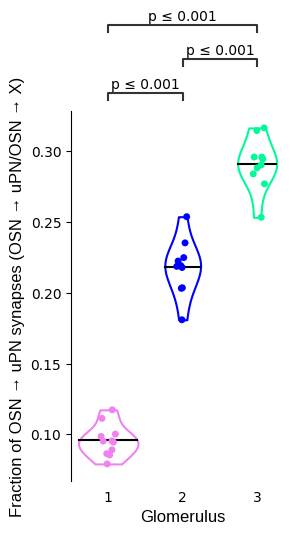

In [12]:
x = "Glomerulus"
y = "OSN → uPN synapses as proportion of OSN → X synapses"
order = ['1', '2', '3']
ax = my_violinplot2(data=df, x=x, y=y, order=order, color="1")
ax = sns.stripplot(data=df, x=x, y=y, order=order, palette=["violet", "#0000FF", "mediumspringgreen"])
ax.set_xlabel('Glomerulus', size=12, fontname="Liberation Sans")
ax.set_ylabel('Fraction of OSN → uPN synapses (OSN → uPN/OSN → X)', size=12, fontname="Liberation Sans")
ax.set_aspect(19)
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.tick_params(axis='y', which='both', left=True, right=False)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False)
add_stat_annotation(ax, data=df, x=x, y=y, order=order,
                    box_pairs=[("1", "2"), ("1", "3"), ("2", "3")],
                    test='Mann-Whitney', text_format='simple', loc='outside', verbose=2)
#plt.savefig('feedforward_proportion.svg', format="svg")
plt.show()

In [13]:
#make dataframe#make dataframe

data_dict = {"1": md1_recurrent, "2": md2_recurrent, "3": md3_recurrent}
pre_df = {"Glomerulus": [], "OSN → OSN synapses as proportion of OSN → X synapses": []}
for glom, dists in data_dict.items():
    glom_list = [glom,]*len(dists)
    pre_df["Glomerulus"].extend(glom_list)    
    pre_df["OSN → OSN synapses as proportion of OSN → X synapses"].extend(dists)

df = pd.DataFrame.from_dict(pre_df)
df

,Glomerulus,OSN → OSN synapses as proportion of OSN → X synapses
0,1,0.181230
1,1,0.172249
2,1,0.214861
3,1,0.225076
4,1,0.232972
5,1,0.231893
6,1,0.219304
7,1,0.166032
8,1,0.195076
9,1,0.185000


/tmp/ipykernel_19638/2577199335.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(data=df, x=x, y=y, order=order, palette=["violet", "#0000FF", "mediumspringgreen"])


1 v.s. 2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.129e-03 U_stat=1.060e+02
2 v.s. 3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.000e+01
1 v.s. 3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.546e-04 U_stat=1.080e+02


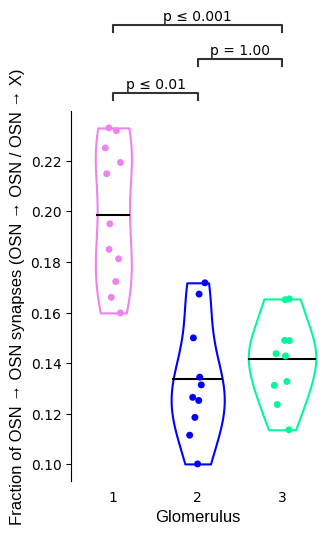

In [14]:
#make violinplot
x = "Glomerulus"
y = "OSN → OSN synapses as proportion of OSN → X synapses"
order = ['1', '2', '3']
ax = my_violinplot2(data=df, x=x, y=y, order=order, color="1")
ax = sns.stripplot(data=df, x=x, y=y, order=order, palette=["violet", "#0000FF", "mediumspringgreen"])
ax.set_xlabel('Glomerulus', size=12, fontname="Liberation Sans")
ax.set_ylabel('Fraction of OSN → OSN synapses (OSN → OSN / OSN → X)', size=12, fontname="Liberation Sans")
ax.set_aspect(30)
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.tick_params(axis='y', which='both', left=True, right=False)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False)
add_stat_annotation(ax, data=df, x=x, y=y, order=order,
                    box_pairs=[("1", "2"), ("1", "3"), ("2", "3")],
                    test='Mann-Whitney', text_format='simple', loc='outside', verbose=2)
#plt.savefig('feedforward_proportion.svg', format="svg")
plt.show()